In [37]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

In [38]:
palm_model_path = "./models/palm_detection.tflite"
landmark_model_path = "./models/hand_landmark.tflite"
anchors_path = "./data/anchors.csv" 

In [39]:
img = cv2.imread('./data/test_img.jpg')[:,:,::-1]

In [40]:
# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

/home/mayank/PycharmProjects/Face-and-Gesture-Lock/modules/hand_tracking/hand_tracker.py:95: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x) )


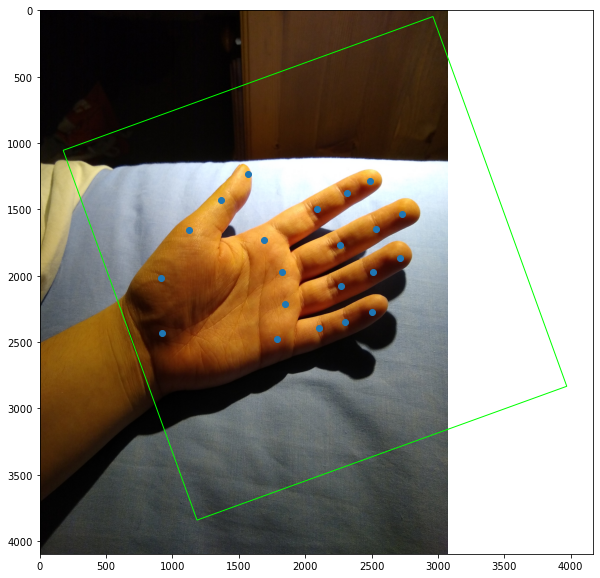

In [7]:
kp, box = detector(img)

f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

ax.scatter(kp[:,0], kp[:,1])
ax.add_patch(Polygon(box, color="#00ff00", fill=False))

## Generating Test dataset

In [42]:
%%time
# listing images
import os

img_list = dict()

for file_name in os.listdir("temp"):
    img_list[file_name] = {'source': cv2.imread("temp/" + file_name)[:,:,::-1]}
    img_list[file_name]['landmark'], img_list[file_name]['box'] = detector(img_list[file_name]['source'])
    
    

CPU times: user 6.82 s, sys: 258 ms, total: 7.08 s
Wall time: 5.68 s


In [43]:
import pickle

In [46]:
with open('dataset.pkl', 'wb') as file:
    pickle.dump(img_list, file)